# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:https://www.kaggle.com/datasets/kabhishm/top-american-colleges-2022

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from matplotlib import style
style.use('ggplot')

college_data = pd.read_csv("top_colleges_2022.csv")
# Question: Is the grant allocation directly impacted by the student population?

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [2]:
college_data.head(5)

,description,rank,organizationName,state,studentPopulation,campusSetting,medianBaseSalary,longitude,latitude,website,...,yearFounded,stateCode,collegeType,carnegieClassification,studentFacultyRatio,totalStudentPop,undergradPop,totalGrantAid,percentOfStudentsFinAid,percentOfStudentsGrant
0,"A leading global research university, MIT attr...",1,Massachusetts Institute of Technology,MA,12195,Urban,173700.0,-71.093539,42.359006,http://web.mit.edu,...,1861.0,MA,Private not-for-profit,Doctoral Universities: Very High Research Acti...,3,12195,4582,35299332.0,75.0,60.0
1,Stanford University sits just outside of Palo ...,2,Stanford University,CA,20961,Suburban,173500.0,-122.168924,37.431370,http://www.stanford.edu,...,1891.0,CA,Private not-for-profit,Doctoral Universities: Very High Research Acti...,4,20961,8464,51328461.0,70.0,55.0
2,One of the top public universities in the coun...,2,"University of California, Berkeley",CA,45878,Urban,154500.0,-122.258393,37.869236,http://www.berkeley.edu,...,1868.0,CA,Public,Doctoral Universities: Very High Research Acti...,19,45878,33208,64495611.0,63.0,53.0
3,Princeton is a leading private research univer...,4,Princeton University,NJ,8532,Urban,167600.0,-74.659119,40.349855,http://www.princeton.edu,...,1746.0,NJ,Private not-for-profit,Doctoral Universities: Very High Research Acti...,4,8532,5516,44871096.0,62.0,61.0
4,"Located in upper Manhattan, Columbia Universit...",5,Columbia University,NY,33882,Urban,148800.0,-73.961288,40.806515,http://www.columbia.edu,...,1754.0,NY,Private not-for-profit,Doctoral Universities: Very High Research Acti...,6,33882,8689,44615007.0,58.0,54.0


In [3]:
import pandas as pd
import numpy as np
college_data = pd.read_csv("top_colleges_2022.csv")


student_pop = college_data["studentPopulation"].describe()
print(student_pop)

count       498.000000
mean      16073.983936
std       16284.865007
min         421.000000
25%        3112.500000
50%        9850.000000
75%       24363.000000
max      102826.000000
Name: studentPopulation, dtype: float64


In [4]:
college_type = college_data.groupby(["collegeType"])["collegeType"].count()
print(college_type)

grant_aid = college_data.groupby(["collegeType"])["totalGrantAid"].sum()
print(grant_aid)

collegeType
Private not-for-profit    270
Public                    228
Name: collegeType, dtype: int64
collegeType
Private not-for-profit    6.322538e+09
Public                    6.008830e+09
Name: totalGrantAid, dtype: float64


In [5]:
college_data.sort_values('medianBaseSalary', ascending=False)

,description,rank,organizationName,state,studentPopulation,campusSetting,medianBaseSalary,longitude,latitude,website,...,yearFounded,stateCode,collegeType,carnegieClassification,studentFacultyRatio,totalStudentPop,undergradPop,totalGrantAid,percentOfStudentsFinAid,percentOfStudentsGrant
0,"A leading global research university, MIT attr...",1,Massachusetts Institute of Technology,MA,12195,Urban,173700.0,-71.093539,42.359006,http://web.mit.edu,...,1861.0,MA,Private not-for-profit,Doctoral Universities: Very High Research Acti...,3,12195,4582,35299332.0,75.0,60.0
1,Stanford University sits just outside of Palo ...,2,Stanford University,CA,20961,Suburban,173500.0,-122.168924,37.431370,http://www.stanford.edu,...,1891.0,CA,Private not-for-profit,Doctoral Universities: Very High Research Acti...,4,20961,8464,51328461.0,70.0,55.0
14,"Founded in 1636 in Cambridge, Massachusetts, H...",15,Harvard University,MA,41024,Urban,169000.0,-71.112957,42.374699,http://www.harvard.edu,...,1636.0,MA,Private not-for-profit,Doctoral Universities: Very High Research Acti...,5,41024,14431,54635593.0,72.0,57.0
113,"Harvey Mudd, a small private college in Clarem...",114,Harvey Mudd College,CA,1132,Suburban,167800.0,-117.716404,34.096100,http://www.hmc.edu,...,1955.0,CA,Private not-for-profit,Baccalaureate Colleges: Arts & Sciences Focus,8,1132,1132,5928636.0,71.0,63.0
3,Princeton is a leading private research univer...,4,Princeton University,NJ,8532,Urban,167600.0,-74.659119,40.349855,http://www.princeton.edu,...,1746.0,NJ,Private not-for-profit,Doctoral Universities: Very High Research Acti...,4,8532,5516,44871096.0,62.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,"Pennsylvania State University, University Park...",323,Pennsylvania State University,PA,102826,Urban,NaN,-77.858780,40.807074,http://www.psu.edu,...,1855.0,PA,Public,Doctoral Universities: Very High Research Acti...,15,102826,84202,78568766.0,75.0,60.0
324,The University of Florida-Online is the virtua...,325,"University of Florida, Online",FL,4932,Urban,NaN,NaN,NaN,NaN,...,NaN,FL,Public,Baccalaureate Colleges: Diverse Fields,49,4932,4932,5067521.0,90.0,87.0
335,The Northeastern University Lifelong Learning ...,336,Northeastern University Lifelong Learning Network,MA,14916,Urban,NaN,NaN,NaN,NaN,...,NaN,MA,Private not-for-profit,Doctoral/Professional Universities,14,14916,4243,NaN,NaN,NaN
444,"<p>Hillsdale College in rural Hillsdale, MI, i...",445,Hillsdale College,MI,1685,Rural,NaN,-84.633435,41.931398,http://www.hillsdale.edu,...,1844.0,MI,Private not-for-profit,Baccalaureate Colleges: Arts & Sciences Focus,9,1685,1619,6921210.0,98.0,97.0


In [6]:
college_data.sort_values('totalGrantAid', ascending=False)

,description,rank,organizationName,state,studentPopulation,campusSetting,medianBaseSalary,longitude,latitude,website,...,yearFounded,stateCode,collegeType,carnegieClassification,studentFacultyRatio,totalStudentPop,undergradPop,totalGrantAid,percentOfStudentsFinAid,percentOfStudentsGrant
124,"Located in the heart of downtown Tempe, Arizon...",125,"Arizona State University, Tempe",AZ,82880,Urban,111300.0,-111.937419,33.425510,http://www.asu.edu,...,1885.0,AZ,Public,Doctoral Universities: Very High Research Acti...,18,82880,69024,157558319.0,94.0,90.0
59,New York University is a large private researc...,60,New York University,NY,58361,Urban,136900.0,-73.997189,40.729844,http://www.nyu.edu,...,1831.0,NY,Private not-for-profit,Doctoral Universities: Very High Research Acti...,8,58361,29633,98732499.0,65.0,60.0
167,"A large private university in Philadelphia, Dr...",168,Drexel University,PA,27720,Urban,124200.0,-75.186582,39.953701,http://www.drexel.edu,...,1891.0,PA,Private not-for-profit,Doctoral Universities: Very High Research Acti...,11,27720,17108,96187904.0,100.0,100.0
249,"Located in Queens, NY, St. John’s University i...",250,St. John's University (NY),NY,23167,Urban,119000.0,-73.791681,40.725631,http://www.stjohns.edu/contact.stj,...,1870.0,NY,Private not-for-profit,Doctoral/Professional Universities,16,23167,18131,89415786.0,100.0,100.0
78,A private research university known for its em...,79,Northeastern University,MA,30003,Urban,120100.0,-71.088990,42.340252,http://www.northeastern.edu,...,1898.0,MA,Private not-for-profit,Doctoral Universities: Very High Research Acti...,14,30003,19769,84882594.0,82.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,Embry-Riddle Aeronautical University-Worldwide...,457,"Embry-Riddle Aeronautical University, Worldwide",FL,20829,Urban,100700.0,NaN,NaN,NaN,...,NaN,FL,Private not-for-profit,Special Focus Four-Year: Other Technology-Rela...,20,20829,15867,284531.0,69.0,67.0
415,"The University of Baltimore is a small, public...",416,University of Baltimore,MD,5198,Urban,94000.0,NaN,NaN,http://www.ubalt.edu,...,NaN,MD,Public,Master's Colleges & Universities: Larger Programs,13,5198,2493,230703.0,93.0,88.0
335,The Northeastern University Lifelong Learning ...,336,Northeastern University Lifelong Learning Network,MA,14916,Urban,NaN,NaN,NaN,NaN,...,NaN,MA,Private not-for-profit,Doctoral/Professional Universities,14,14916,4243,NaN,NaN,NaN
362,"Loma Linda University in southern California, ...",363,Loma Linda University,CA,5447,Suburban,108700.0,NaN,NaN,NaN,...,NaN,CA,Private not-for-profit,Special Focus Four-Year: Medical Schools & Cen...,3,5447,1811,NaN,NaN,NaN


## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

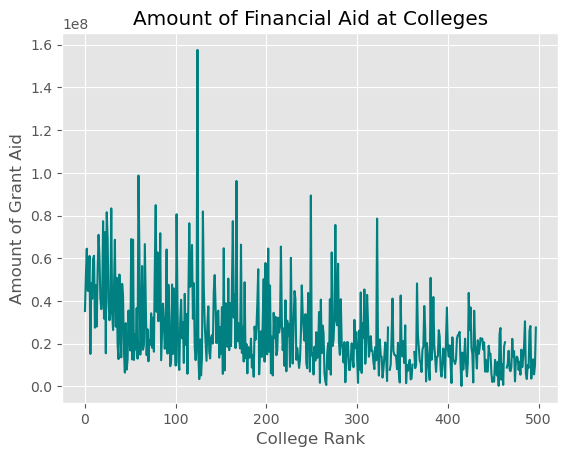

In [7]:
college_data["totalGrantAid"].plot.line(x="organizationName", y="totalGrantAid", rot=0, color='teal')
plt.xlabel("College Rank")
plt.ylabel("Amount of Grant Aid")
plt.title("Amount of Financial Aid at Colleges")
plt.show()

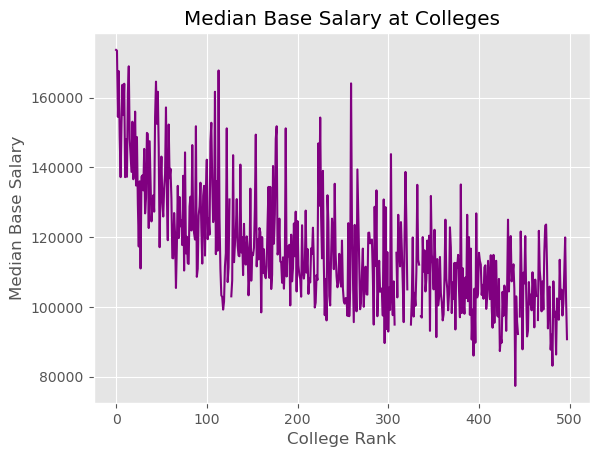

In [8]:
college_data["medianBaseSalary"].plot(x="organizationName", y="medianBaseSalary", rot=0, color='purple')
plt.xlabel("College Rank")
plt.ylabel("Median Base Salary")
plt.title("Median Base Salary at Colleges")
plt.show()

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? Not really it kind of made sense, but I find it interesting that there is one school that has about twice as much financial aid as any other school. 
2. Do you have any concerns about your dataset? No, not really. However I have found it hard to come up with good questions.
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? I personally am only looking at 3 columns. That does not mean that the others are not beneficial.